In [54]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Input
import tensorflow as tf
import matplotlib.pyplot as plt

In [55]:
# Load the training data
M = np.genfromtxt('./monks_data/monks-1.train', missing_values=0, skip_header=0, delimiter=',', dtype=int)
ytrn = M[:, 0]
Xtrn = M[:, 1:]

# Load the test data
M = np.genfromtxt('./monks_data/monks-1.test', missing_values=0, skip_header=0, delimiter=',', dtype=int)
ytst = M[:, 0]
Xtst = M[:, 1:]

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.4846 - loss: 0.8565
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5873 - loss: 0.7006 
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.5877 - loss: 0.6924
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.6212 - loss: 0.6741
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.5991 - loss: 0.6805
Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.4935 - loss: 0.7150
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6208 - loss: 0.6629
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.7057 - loss: 0.6426
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.7289 - loss: 0.6204
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.7236 - loss: 0.5767
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.6284 - loss: 0.6702
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.5937 - loss: 0.6678
Epoch 1/10
4/4 ━━━━━━━━

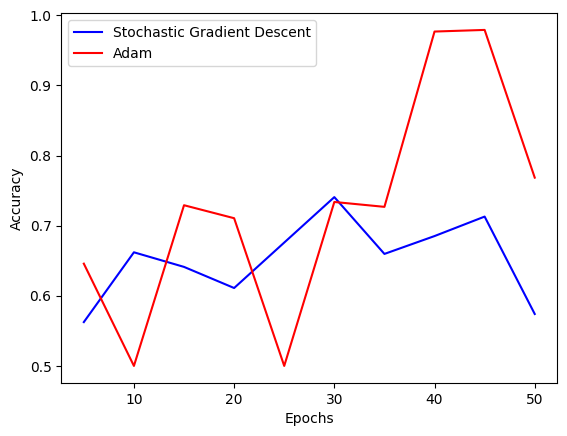

In [58]:
epochs = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
sgd_acc = []
adam_acc = []

for epoch in epochs:
    model_sgd = Sequential()
    model_sgd.add(Input((6,)))
    model_sgd.add(Dense(8, activation='tanh'))
    model_sgd.add(Dense(6, activation='relu'))
    model_sgd.add(Dense(1, activation='sigmoid'))
    model_adam = Sequential()
    model_adam.add(Input((6,)))
    model_adam.add(Dense(8, activation='tanh'))
    model_adam.add(Dense(6, activation='relu'))
    model_adam.add(Dense(1, activation='sigmoid'))

    model_sgd.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.06), metrics=['accuracy'])
    model_adam.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.06), metrics=['accuracy'])

    model_sgd.fit(Xtrn, ytrn, epochs=epoch)
    model_adam.fit(Xtrn, ytrn, epochs=epoch)

    sgd_results = model_sgd.evaluate(Xtst, ytst, return_dict=True)
    adam_results = model_adam.evaluate(Xtst, ytst, return_dict=True)

    sgd_acc.append(sgd_results['accuracy'])
    adam_acc.append(adam_results['accuracy'])

plt.plot(epochs, sgd_acc, c='b', label='Stochastic Gradient Descent')
plt.plot(epochs, adam_acc, c='r', label='Adam')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()